Q1-1,2

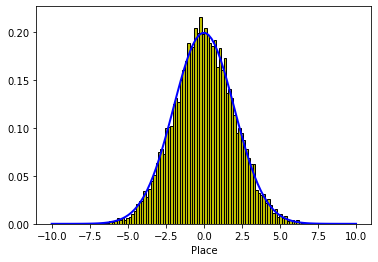

In [25]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

def placement(e):
    samp = bernoulli.rvs(p=0.5, size= 10000*b1)
    b1= 1 #time for b1, for b2,b3,b4 we should change the number
    ups = np.sum(samp)
    downs = 10000*b1 - ups
    m = e * (ups - downs) 
    return m

Var = []
e = 0.02
for i in range (10000) :
    place = placement(e)
    Var.append(place)

plt.hist(Var, label='Brownie Motion', density = 'true', color = 'y', edgecolor = 'black', bins = 100)
X = np.linspace(-10 ,10 ,100) 
sigma = 10000 *e*e
ar = np.array(X)
fx = (1 / (math.sqrt(2*math.pi*sigma))) * np.exp(-((ar)**2)/(2*sigma))
plt.plot(X, fx, label = 'pdf', color = 'b', linewidth = 2) 

plt.xlabel('Place')
plt.show()


Q2-1

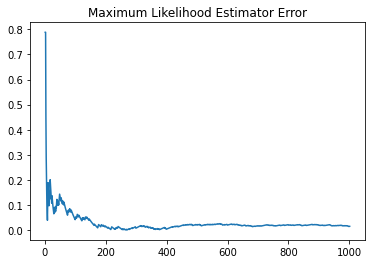

In [15]:
from scipy.stats import bernoulli
import random
import matplotlib.pyplot as plt
import numpy as np


def ErrorEstimator(n):
    p = random.uniform(0, 1)
    Samples = bernoulli.rvs(p=p , size=n) 

    ML_Estimator = [Samples[0]] * n
    for i in range(1, n):
        ML_Estimator[i] = ((i) * ML_Estimator[i-1] + Samples[i])/(i+1)
    
    ErrorArray = []
    for i in range(0, n):
        ErrorArray.append(abs(ML_Estimator[i] - p))
    
    return ErrorArray

Errors = ErrorEstimator(1000)
x = np.linspace(1, 1001, 1000)
plt.plot(x, Errors)
plt.show()


Q2-2

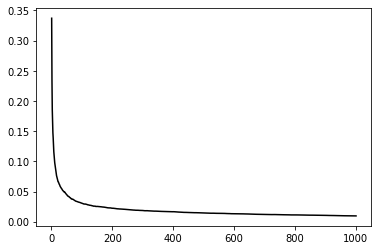

In [27]:
from scipy.stats import bernoulli
import random
import matplotlib.pyplot as plt
import numpy as np


def ErrorEstimator(n):
    p = random.uniform(0,1)
    Samples = bernoulli.rvs(p=p , size=n) 

    ML_Estimator = [Samples[0]] * n
    for i in range(1, n):
        ML_Estimator[i] = ((i) * ML_Estimator[i-1] + Samples[i])/(i+1)
    
    ErrorArray = []
    for i in range(0, n):
        ErrorArray.append(abs(ML_Estimator[i] - p))
    
    return ErrorArray


temp = [0] * 1000

for i in range(1000):
  temp = np.add(temp, ErrorEstimator(1000))
x = np.linspace(1, 1001, 1000)
y = temp*(0.001)
plt.plot(x,y, color = 'k')
plt.show()


Q3

Mu :  -0.7481611734632718
Sigma :  0.31391493616888866
The best Estimate of Mu = -0.7481610418067952
The best Estimate of sigma = 0.3139048014514124


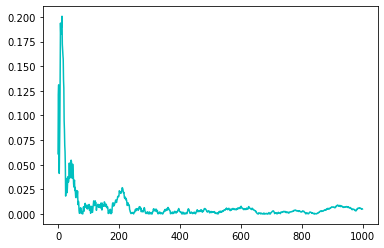

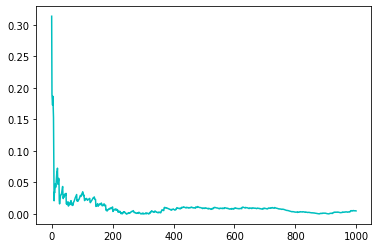

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import math

def Estimators():
    
    Mu = np.random.uniform(-2, 2)
    Sigma = np.random.uniform(0, 5)    
    print('Mu : ', Mu)
    print('Sigma : ', Sigma)
    n = 1000
    Samples = np.random.normal(Mu, Sigma, n)
    Mu_Estimator = [0] *n
    Sigma_Estimator = [0] *n
    Sigma_Estimator_Error = []
    Mu_Estimator_Error = []
    
    for i in range(n):
      Mu_Estimator[i] = (i * Mu_Estimator[i-1] + Samples[i])/(i+1)
    
    mean1 = np.mean(Samples)
    for i in range (1 , n):
      a = Sigma_Estimator[i-1]
      b = Samples[i] - mean1
      Sigma_Estimator[i] = math.sqrt((i*a*a + b*b)/(i+1))
    
    for i in range (n):
        Mu_Estimator_Error.append(abs(Mu_Estimator[i] - Mu))
        Sigma_Estimator_Error.append(abs(Sigma_Estimator[i] - Sigma))

    Mu_best_Estimate = Mu_Estimator[Mu_Estimator_Error.index(min(Mu_Estimator_Error))]
    print('The best Estimate of Mu =' ,  Mu_best_Estimate)
    Sigma_best_Estimate = Sigma_Estimator[Sigma_Estimator_Error.index(min(Sigma_Estimator_Error))]
    print('The best Estimate of sigma =' , Sigma_best_Estimate)
    
    return Mu_Estimator_Error, Sigma_Estimator_Error




temp = Estimators()

x = np.arange(1000)
Mu_Estimator_Error = temp[0] 
Sigma_Estimator_Error = temp[1]
plt.plot(x, Mu_Estimator_Error, color = 'c')
plt.show()
plt.plot(x, Sigma_Estimator_Error, color = 'c')
plt.show()


Q4-1


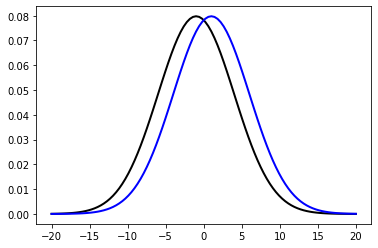

In [34]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
data1 = norm.rvs(-1.0, 5, size=100)
mu1, std1 = norm.fit(data1)
x1 = np.linspace(-20, 20, 100)
p1 = norm.pdf(x1, -1, 5)
p2 = norm.pdf(x1, 1, 5)
             
plt.plot(x1, p1, 'k', linewidth=2)
                    
plt.plot(x1, p2, 'b', linewidth=2)

plt.show()

Q4-2


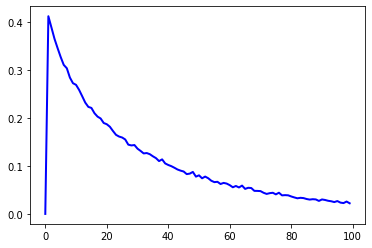

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
from scipy.stats import bernoulli

Indicator = bernoulli.rvs(p = 0.5, size = 100) 
MeanError = [0] * 100
for i in range(0, 100):
    if Indicator[i] == 1:
        mu= 1
        sigma = 5
    else:
        mu= -1
        sigma = 5
    
    Estimation = [0] * 10000
    EstimationError = [0] * 10000
    for k in range(0, 10000):
        Samples = np.random.normal(mu, sigma, i)
        SamplesSigma = np.sum(Samples)
        if SamplesSigma > 0:
            Estimation[k] = 1
  
        EstimationError[k] = np.absolute(Estimation[k] - Indicator[i])
    MeanError[i] = np.mean(EstimationError)
plt.plot(MeanError, color = 'b', linewidth = 2)
plt.show()

Q5

In [3]:
import random
import numpy as np
import math

def FindMin() :
    A = np.random.exponential(scale = 1/2.2, size = 1)
    B = np.random.exponential(scale = 1/3, size = 1)
    C = np.random.exponential(scale = 1/5, size = 1)
    D = np.random.exponential(scale = 1/1, size = 1)
    E = np.random.exponential(scale = 1/0.5, size = 1)
    F = np.random.exponential(scale = 1/1.2, size = 1)
    
    A = B = min(A, B)
    C = B = min(C, B)
    F = D = min(F, D)
    D = E = min(D, E)
    E = B = min(E, B)
    
    if B == C:
        A = B
        E = B
    elif B == E:
        A = B
        C = B
    else :
        E = B
 

sum of the vertices = {12.902349051321941}
